Begin by loading the data, and erasing ~10% (2500 samples) for validation ('99' is used as a marker)
NOTE the original data-set is retained for reference purposes

In [2]:
import pandas as pd
import random

df = pd.read_csv("jester-data-1.csv", header=None)
data = df.copy() #take a copy as we need the original values for validation 
data.drop(data.columns[0], axis=1, inplace=True) #1st column is irrelevant to exercise

users = data.shape[0]
jokes = data.shape[1]
#now randomly remove 2500 ratiings
#only valid ratings (<> 99) are removed, until we reach the target 2500
i = 0
while i < 2500:
    user = random.sample(range(0, users), 1)[0]
    joke = random.sample(range(0, jokes), 1)[0]
    if data.iloc[user, joke] != 99:
        data.iloc[user, joke] = 99
        i += 1

Latent feature weights are now generated for both users and items (jokes)
To begin with, TWO features (attributes) are employed for both users and jokes

In [3]:
import numpy as np

n_features = 2

user_ratings = data.values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_features))
latent_item_features = np.random.random((user_ratings.shape[1], n_features))

Starting with these orginal random features values, the predicted rating (ie. product) is calculated for every user|joke
The deviation (error) of each prediction is then used to adjust the 2 feature weights for each component (user|joke).
A v.small learning rate (multiplier) is used to progressively adjust the weights

To begin with, 50 cycles are performed.
The run time is calculated to indicate why we stopped at 50 iterations (practical limitation)

In [4]:
import time

def predict_rating(user_id,item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha = 0.0001):
    """ a learning rate of 0.0001 is applied for adjusting the feature weights.
    """    
    prediction_rating = predict_rating(user_id, item_id)
    err =  prediction_rating - rating
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    
def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    for iteration in range(0,iterations):
        error = []
        for user_id in range(0,latent_user_preferences.shape[0]):
            for item_id in range(0,latent_item_features.shape[0]):
                rating = user_ratings[user_id][item_id]
                if rating != 99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if(iteration%5 == 0):
            print(mse)
    return

cycles = 50
t0 = time.time()
sgd(cycles)
print(time.time() - t0,"secs to run", cycles, "iterations")

26.168652736068598
24.236837435378554
23.066220576853873
22.03948157967044
21.258538445390887
20.628358742403126
19.812834808037096
18.599685902245042
17.732328945223923
17.395234243471837
859.8116097450256 secs to run 50 iterations


0 cycles - 26.16242668482842
5 cycles - 24.23635625592631
10 cycles - 23.054088035114788
15 cycles - 22.024882237706066
20 cycles - 21.26160695478686
25 cycles - 20.711197751218464
30 cycles - 20.146831474272094
35 cycles - 19.1905002307553
40 cycles - 18.091633616000678
45 cycles - 17.534870858905958
50 cycles - 17.323995796996034
55 cycles - 17.232261207742763
60 cycles - 17.186262382864456
65 cycles - 17.16141540055086
70 cycles - 17.147516167859372
75 cycles - 17.13961231726456
80 cycles - 17.135094851182544
85 cycles - 17.132529774352932
90 cycles - 17.131107897835395
95 cycles - 17.130363570159655
1745.740651845932 secs to run 100 iterations


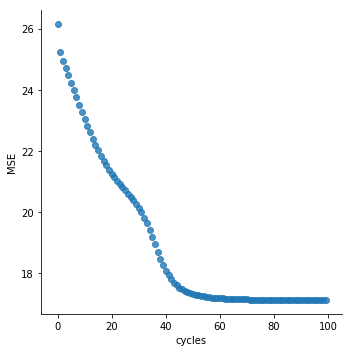

In [7]:
import pandas as pd
import random

df = pd.read_csv("jester-data-1.csv", header=None)
data = df.copy() #take a copy as we need the original values for validation 
data.drop(data.columns[0], axis=1, inplace=True) #1st column is irrelevant to exercise

users = data.shape[0]
jokes = data.shape[1]
#now randomly remove 2500 ratiings
#only valid ratings (<> 99) are removed, until we reach the target 2500
i = 0
while i < 2500:
    user = random.sample(range(0, users), 1)[0]
    joke = random.sample(range(0, jokes), 1)[0]
    if data.iloc[user, joke] != 99:
        data.iloc[user, joke] = 99
        i += 1

import numpy as np

n_features = 2

user_ratings = data.values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_features))
latent_item_features = np.random.random((user_ratings.shape[1], n_features))
        
import time
import matplotlib.pyplot as plt
import seaborn as sb

def predict_rating(user_id,item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha = 0.0001):
    """ a learning rate of 0.0001 is applied for adjusting the feature weights.
    """    
    prediction_rating = predict_rating(user_id, item_id)
    err =  prediction_rating - rating
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    
def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mean_error = []
    for iteration in range(0,iterations):
        error = []
        for user_id in range(0,latent_user_preferences.shape[0]):
            for item_id in range(0,latent_item_features.shape[0]):
                rating = user_ratings[user_id][item_id]
                if rating != 99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()
        mean_error.append(mse)
        if(iteration%5 == 0):
            print(iteration, "cycles -",mse)
    return mean_error

cycles = 100
t0 = time.time()
error = sgd(cycles)
print(time.time() - t0,"secs to run", cycles, "iterations")

plotdata1 = pd.DataFrame(np.vstack((np.arange(np.array(error).shape[0]), error)).T, columns=['cycles', 'MSE'])
plt.figure()
sb.lmplot(plotdata1.columns[0], plotdata1.columns[1], data=plotdata1, fit_reg=False)

As can be seen above, after around 50 iterations, there is a very marked reduction in rate of improvement. The error is however still reducing, albeit very slowly.
These 100 cycles took 30mins (~1750 secs) to run.
At this final very slow rate of gain, a very very long run time would hence be needed to achieve significant improvement

We will now calculate the MSE for the 'validation' samples that were not available for learning - ie. where we had removed the rating for testing purposes.
This is a better test of performance, as these samples come from a separate population that were not exposed in learning phase

In [8]:
predictions = latent_user_preferences.dot(latent_item_features.T)

error = []
for user in range(users):
    for joke in range(jokes):
        #if this was a salient data point in the original sample
        if df.iloc[user, joke + 1] != 99:
            #and we used it for validation
            if data.iloc[user, joke] == 99: 
                #then compare predicted rating to original actual rating
                err = predictions[user, joke] - df.iloc[user, joke + 1]
                error.append(err)
mse = (np.array(error) ** 2).mean()
print(mse, "error across the", len(error), "original ratings")

17.803216488200594 error across the 2500 original ratings


This error (17.80) is slightly higher than the final error reported during learning (17.13).
This margin reflects the fact that these particular pairs (user|joke) were not exposed during training

More importantly, however, it still proves the utility of the approach - the meta-features we have built successfully generalise to these other samples unseen during learning - as 17.80 is still far better than the original error rate of 26.16

The learning rate is now TRIPLED to  0.0003, to observe the effect

NOTE - the full code is not shown - as it largely replicates the code already shown above
I have just include those snippets, that show the relevant adjustments

0 cycles - 25.400355333556575
5 cycles - 21.414598543483855
10 cycles - 17.61337489638814
15 cycles - 17.298528290164153
20 cycles - 17.26461432333832
25 cycles - 17.265517801793415
30 cycles - 17.273301299751463
35 cycles - 17.28319059529316
40 cycles - 17.294421834264103
45 cycles - 17.307033064068325
50 cycles - 17.321234732448698
55 cycles - 17.33727848540834
60 cycles - 17.355429134459307
65 cycles - 17.375956057048658
70 cycles - 17.39912666063328
75 cycles - 17.4252009546121
80 cycles - 17.45443198253503
85 cycles - 17.48708021861676
90 cycles - 17.52345214439141
95 cycles - 17.56397308632421
1745.7525146007538 secs to run 100 iterations


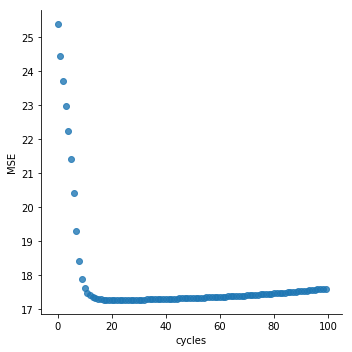

In [11]:
def train(user_id, item_id, rating, alpha = 0.0003):
    """ a learning rate of 0.0003 (triple) is now applied for adjusting the feature weights.
    """    
    prediction_rating = predict_rating(user_id, item_id)
    err =  prediction_rating - rating
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

As can be seen above, incereasing the learning rate has increased the speed to convergence (to around 10 cycles)
However the resulting error is slightly higher, and furthermore this error is now increasing with further cycles
It appears that increasing the learning rate is detrimental to the results. A smaller learning rate over more extended cycles gives better results

The number of meta (latent) features is now increased to THREE for both users and jokes, to observe the effect.
The original learning rate of 0.0001 is re-instated

NOTE - the full code is not shown - as it largely replicates the code already shown above
I have just include those snippets, that show the relevant adjustments

0 cycles - 25.82291303836171
5 cycles - 24.397459351357078
10 cycles - 23.50220602928043
15 cycles - 22.28588006485448
20 cycles - 20.098547815871008
25 cycles - 18.205400923808767
30 cycles - 17.58999708383573
35 cycles - 17.371620936127865
40 cycles - 17.253187405354947
45 cycles - 17.164432380451817
50 cycles - 17.07884151755705
55 cycles - 16.983484586460253
60 cycles - 16.87628736674226
65 cycles - 16.765643395001472
70 cycles - 16.663701143795397
75 cycles - 16.577751763279554
80 cycles - 16.50850988363843
85 cycles - 16.453536059836093
90 cycles - 16.410015438482485
95 cycles - 16.375628460860067
1750.013827085495 secs to run 100 iterations


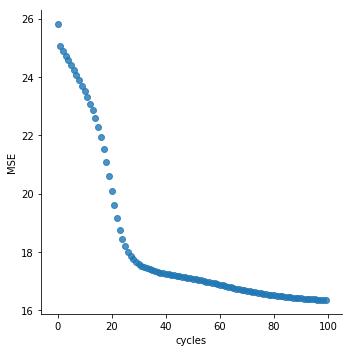

In [12]:
n_features = 3

def train(user_id, item_id, rating, alpha = 0.0001):
    """ a learning rate of 0.0001 is applied for adjusting the feature weights.
    """    
    prediction_rating = predict_rating(user_id, item_id)
    err =  prediction_rating - rating
    user_pref_values = latent_user_preferences[user_id][:]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

As can be seen above, increasing the #features has further improved the convergence.
The final residual error is now almost 1% smaller - and the rate of convergence is steeper

We will now check the validation error on the un-seen ratings

In [13]:
predictions = latent_user_preferences.dot(latent_item_features.T)

error = []
for user in range(users):
    for joke in range(jokes):
        #if this was a salient data point in the original sample
        if df.iloc[user, joke + 1] != 99:
            #and we used it for validation
            if data.iloc[user, joke] == 99: 
                #then compare predicted rating to original actual rating
                err = predictions[user, joke] - df.iloc[user, joke + 1]
                error.append(err)
mse = (np.array(error) ** 2).mean()
print(mse, "error across the", len(error), "original ratings")

17.60773873578723 error across the 2500 original ratings


This shows a slight improvement on the original (2-feature) validation score.
This is much smaller, however, than the amount of improvement shown during the above learning phase. 